# Introduction to multiphysics modeling of sizing scenarios
*Written by Marc Budinger, INSA Toulouse, France*

The aim of this section is to illustrate how multiphysics modelling with localised parameters can be used to derive requirements from a system level, such as a rocket, to a sub-system level, such as a TVC actuation system. We will illustrate here how the maximum forces and speeds of a nozzle actuator can be obtained:
- using a Modelica model  
- using a numerical simulation of the corresponding equations in Python


## Nozzle modeling

The nozzle is composed of:
- a flexible bearing or flexseal which links the nozzle to the launcher and enables rotational movement. The equivalent characteristics and parameters for this flexible bearing are:
    - a stiffness of 1.52E+04 Nm/deg.
    - a viscous damping of 1.74E+02	Nms/deg
- a rigid cone modeled here as: 
    - an inertia of 1.40E+03 kg.m^2
    
*P80 Nozzle (from [ESA presentation](http://www.ingaero.uniroma1.it/attachments/1609_VEGA%20%20sapienza%20small.pdf))*:
![P80](./figures/nozzle.png)

The EMA (Electro Mechanical Actuator) is between 2 points of the following drawing. The given values correspond to a nominal case. The lever arm for these nominal dimensions is 1.35 m at neutral position. The variation of lever arm with position order is assumed to be negligeable here due to the small nozzle deflection (+/- 5.7° max)

*Actuator implantation*:  
<img src="./figures/ImplantationNozzle.png" alt="image" width="300" height="auto">


> **Exercice**: Propose a diagram made up of rotational inertia, torsional stiffness and viscous friction to represent the nozzle. Complete it to represent the EMA actuator, assumed here to be a source of force.

:::{dropdown} Quiz  
:close:  
Select the diagram corresponding to the previous question: Propose a diagram made up of rotational inertia, torsional stiffness and viscous friction to represent the nozzle.
<img src="./figures/NozzleDiagram.png" alt="image" width="300" height="auto">

:::

:::{dropdown} Modelica diagram  
:close:  
**Electronic and computer technologies** have been integrated into combustion-powered vehicles:
- 10 circuits (electrical and fluids)
- 12% value = IT, > 25 computers per vehicle
- 30% value other than mechanical 

**New architectures** are seeing a multiplication of functions:
- GPS, Mobile, Multimedia
- Active safety (ABS, ESP, lane tracking, ADAS)

**Power electronics, electric motors and electrochemical technologies** are playing an increasingly important role in:
- Driving assistance: electric steering, variable assistance and gear ratios
- Propulsion systems: hybrid and electric
- Energy storage: the price of the battery can represent 40 to 50% of the total price of the vehicle.
:::

## Sizing scenarios

Les éxigences au niveau fusée et notemment en terme de stabilité de vol permettent de générer des profils d'ordre typiques de déplacement au niveau tuyere. Ces profils pourront être utlisé sur bancs d'essais pour qualifier les performances du système réalisé.

Exemple de profils P80 (Emmanuel Gougeon)

Question: Que pensez-vous de ce profil ? 
Réponse: Ces sont des ordres provenant du on-board computer mais ils ne pourront pas être parfaitement respectés car ils demanderaient des accelérations infinies et des puissances infinies.

A ces profils d'ordre s'ajoutent des temps de réponses pouvant dépendre de l'amplitude : 
par exemple 72 ms de temps de réponse sur des variatons de niveaux de 0.5°. 

Nous supposerons pour la suite que la demande la plus critique est un échelon de 5.2 à 5.7° d'angle de débattement à effectuer en 72 ms.

Question: Comment générez-vous un profil réaliste d'angle de tuyère à partir de cette exigence ?
Réponse: On peut supposer que le système, en boucle fermé, répondra comme une fonction de transfert du second ordre. L'éxigences de temps de réponse peut se décliner alors en une bande passante. 


### Dynamic sizing scenario

For this scenario, we will assume that the position close loop system will response as a second order filter between real position and order:  
$H(p)=\frac{1}{1+\frac{2\xi p}{\omega_0}+\frac{p^2}{\omega_0^2}}$  
with $\xi=0.7$ and thus $t_{r5}=\frac{2.9}{\omega_0}$  

We calculate here position, speed and accelration of the nozzle for a step request (2 to 3° in 72 ms).



*Vega Launcher 1st stage (P80) :*
![Vega 1st stage](./pictures/P80_stage1.png)


In [ ]:
CdTheta/dt = qheat - Qpertes
qheat = qpertes

(1) C1 dTheta1/dt = Q
(2) C2 dTheta2/dt = Qheat - Qpertes 

on peut réécrire (1) avec Theta2=Constante
et en deduire Qheat max

puis verifier avec controleur simple de type TOR hysteresis


<IPython.core.display.Javascript object>


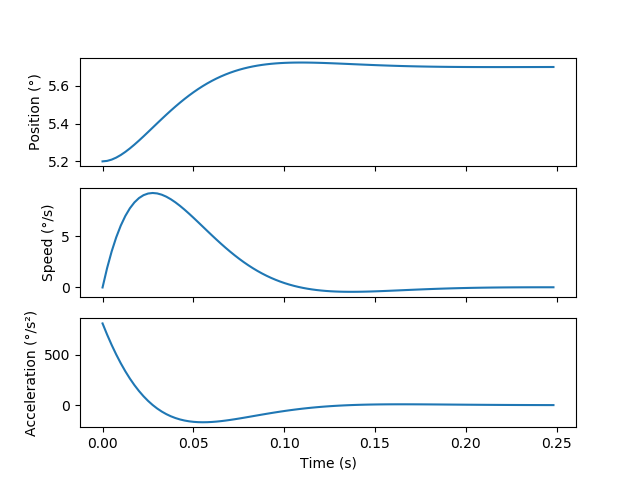

In [23]:
# Import from scipy of the step response
from scipy.signal import step

# Definition of time response, damping coef, and angular frequency of the filter
tr=72e-3
w0=2.9/tr
eps=0.7

# position calculation with a second order step response
num = [1.]
den = [1/w0**2, 2*eps/w0, 1]
t, y = step(system=(num, den))
y = 5.2 + .5*y

# speed, we change here only the numerator of the transfer function
nump = [1., 0.]
t, yp = step(system=(nump, den))
yp=0.5*yp

# acceleration
nump = [1., 0., 0.]
t, ypp = step(system=(nump, den))
ypp=0.5*ypp

# plot of the different dynamic answers
import matplotlib.pyplot as plt

f, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(t,y)
ax1.set_ylabel('Position (°)')
ax2.plot(t, yp)
ax2.set_ylabel('Speed (°/s)')
ax3.plot(t,ypp)
ax3.set_ylabel('Acceleration (°/s²)')
ax3.set_xlabel('Time (s)')
plt.show()



*Thrust Vector Control (TVC) actuation system :*
![TVC Actuation system](./pictures/P80_vega_TVC_system.png)




Caractéristiques de la tuyère :
Bras de levier
1,5 m

Inertie
7800 kg.m²

Raideur de la butée flexible
49000 Nm/deg

Amortissement de la butée flexible


Modèle modélica

1.	Utilisez les composants mécaniques Modelica pour représenter la tuyère de la fusée en utilisant les données de la Figure 25. Le vérin hydraulique sera représenté ici sous la forme d’une source d’effort linéaire. 
2.	Déterminez la force à appliquer pour obtenir une déflexion de 6°.Vérifiez par simulation (Figure 26a).
3.	Implémenter une boucle fermée idéale en position comme représenté Figure 26b. Simulez la réponse à un déplacement  de 2° à 3° en suivant la dynamique d’un second ordre d’amortissement 0.7 et de temps de réponse 72 ms.
4.	Observez la force et la vitesse à fournir par le vérin hydraulique pour pouvoir suivre ce profil de mission. Relevez les grandeurs maximales Fmax et vmax des efforts et vitesses qui peuvent être utilisées pour la sélection des composants. 


## Nozzle modeling

The nozzle is composed of :
- a flexible bearing or flexseal which links the nozzle to the launcher and enables rotational movement. The equivalent characteristics and parameters for this flexible bearing are:
    - a stiffness of 1.52E+04 Nm/deg.
    - a viscous damping of 1.74E+02	Nms/deg
- a rigid cone modeled here as: 
    - an inertia of 1.40E+03 kg.m^2
    

*P80 Nozzle (from [ESA presentation](http://www.ingaero.uniroma1.it/attachments/1609_VEGA%20%20sapienza%20small.pdf)):*
![P80](./pictures/nozzle.png)

In [20]:
# import math package whic contains usefull mathematical functions and variables
import math
import numpy as np

# Definition of nozzle equivalent parameters with engineering units
Jnozzle= 1.40E+03 # [kg.m2] Inertia
Knozzle= 1.52E+04 # [Nm/deg] Stiffness
Fnozzle= 1.74E+02 # [Nms/deg] Viscous damping

# Calculate SI unit values of Knozzle and Fnozzle
# pi value is math.pi

# student part -------------
Knozzle = Knozzle / (math.pi/180)
Fnozzle = Fnozzle / (math.pi/180)
# --------------------------

# Print the corresponding values with print("xxx %f xxx %f "%(value1,value2)
print("Knozzle = %4.2e Nm/rad and Fnozzle = %4.2e Nms/rad"%(Knozzle, Fnozzle))
        

Knozzle = 8.71e+05 Nm/rad and Fnozzle = 9.97e+03 Nms/rad


### Lever arm calculation

The EMA (Electro Mechanical Actuator) is between M and N points of the following drawing. The given values correspond to a nominal case. 

*P80 Nozzle section :*  
<img src="./pictures/LeverArmNozzle.png" style="float:center; max-width: 400px; display: center" alt="P80" /></a> 



For the following steps, we need to calculate the equivalent lever arm between the linear displacement of the actuator and the rotational displacement of the nozzle. Thanks to the *Sympy* package, a symbolic calculation of this lever arm, function of d1 and d2, is possible. 

Remember that the link between the torque T on the nozzle and the force F of the actuator can be calculated with the following cross product:  
$\vec{T}=\vec{OM} \times \vec{F}=\vec{OM} \times \frac{\vec{NM}}{\left|\vec{NM}\right|} F $  
thus the equivalent lever arm can be calculated with:  
$L_{arm}=\left| \vec{OM} \times \frac{\vec{NM}}{\left|\vec{NM}\right|} \right|$  
and the torque can be calculated with the simple equation:  
$T=L_{arm}.F$

Remark: the variation of lever arm with position order is assumed to be negligeable here due to the small nozzle deflection (+/- 5.7° max)

In [21]:
# import vector manipulation and symbols definition of Sympy
from sympy.physics.mechanics import ReferenceFrame, Vector
from sympy import symbols, lambdify

alpha=13*3.14/180  # [rad] cone angle

# definition of d1 and d2 variable for symbolic calculation
d1, d2= symbols('d1 d2')

# definition of a reference frame for vectors definiions
N = ReferenceFrame('N')

# definition of OM and ON vectors thanks N.x and N.y reference (unit) vectors
OM=(0.5+(2.145+d1)*np.sin(alpha))*N.x+(0.718-(2.145+d1)*np.cos(alpha))*N.y
     
ON=1.358*N.x-(0.2+d2)*N.y

NM=OM-ON            
print("The expression of the actuator length is :\n", NM.magnitude().evalf(4))

# The lever arme
Larm=(OM ^NM.normalize()).magnitude()
print("The expression of the equivalent lever arm  is :\n",Larm.evalf(4))


The expression of the actuator length is :
 ((0.2248*d1 - 0.3757)**2 + (-0.9744*d1 + d2 - 1.172)**2)**0.5
The expression of the equivalent lever arm  is :
 ((-(-0.9744*d1 - 1.372)*(0.2248*d1 - 0.3757)*((0.2248*d1 - 0.3757)**2 + (-0.9744*d1 + d2 - 1.172)**2)**(-0.5) + (0.2248*d1 + 0.9823)*((0.2248*d1 - 0.3757)**2 + (-0.9744*d1 + d2 - 1.172)**2)**(-0.5)*(-0.9744*d1 + d2 - 1.172))**2)**0.5


This expression can be evaluated:
- at the nominal anchorage point (d1=0 and d2=0)
- for different anchorage points 

In [22]:
# Transform the expression into a numerical function
Evaluate_Larm=lambdify((d1,d2),Larm)

print("The lever arm for the nominal dimensions is %4.2f m"%Evaluate_Larm(0,0))


The lever arm for the nominal dimensions is 1.35 m


<IPython.core.display.Javascript object>


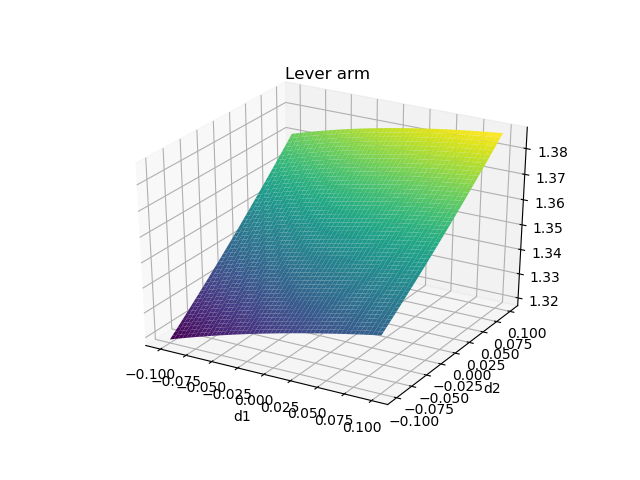

<IPython.core.display.Javascript object>


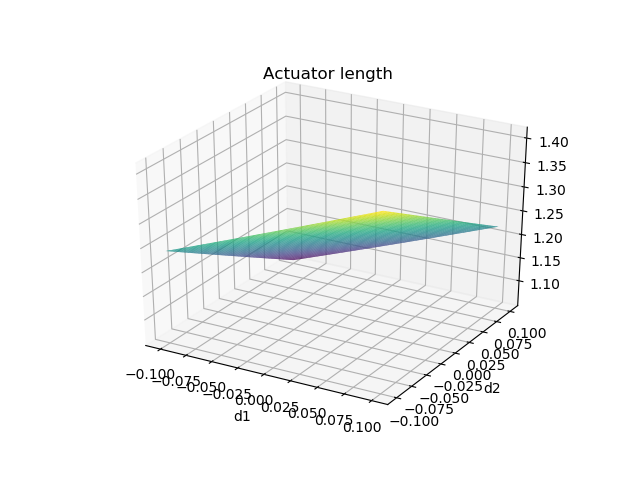

In [5]:
# Import plot3d function  from sympy package 
from sympy.plotting import plot3d
%matplotlib notebook

# plot the Lever arm in function of d1 and d2 variables
plot3d(Larm, (d1, -.1, +.1), (d2, -.1, +.1), xlabel='d1', ylabel='d2', title='Lever arm')

# plot the Actuator Length in function of d1 and d2 variables
plot3d(NM.magnitude(), (d1, -.1, +.1), (d2, -.1, +.1), xlabel='d1', ylabel='d2', title='Actuator length')


## Sizing scenarios modeling

2 use cases must be checked during the design:
- a static deflection of 5.7 °
- a dynamic mission profile which must ensure a response time of 72 ms for a position step of 5.2 to 5.7 °.
   
    

### Static sizing scenario



The maximal angular displacement is 5.7°. The corresping force can be calculated thanks the flexible bearing stiffness.

In [6]:
teta_max=5.7*math.pi/180

Fstat_max=Knozzle*teta_max/Evaluate_Larm(0,0)

print("The maximum static force is %4.2e N."%Fstat_max)

The maximum static force is 6.40e+04 N.


It's now possible to calculate the force of the actuator which is requested to respect this mission profile.

<IPython.core.display.Javascript object>


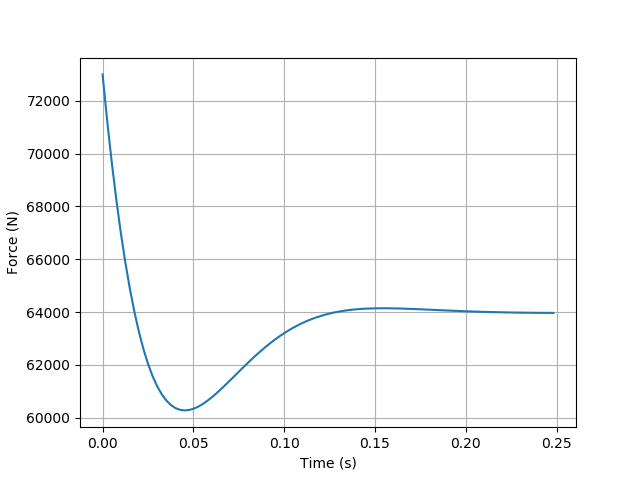

In [24]:
# degree to rad
teta, tetap, tetapp = math.pi/180*y, math.pi/180*yp, math.pi/180*ypp

# Force calculation
Fdyn=(Jnozzle*tetapp+Fnozzle*tetap+Knozzle*teta)/Evaluate_Larm(0,0)

g, gx1 = plt.subplots(1,1, sharex=True)
gx1.plot(t,Fdyn)
gx1.set_ylabel('Force (N)')
gx1.set_xlabel('Time (s)')
gx1.grid()
plt.show()

# Force speed diagram 

This sizing scenarios can be represented on a force-speed diagram usefull for compenent selection.


<IPython.core.display.Javascript object>


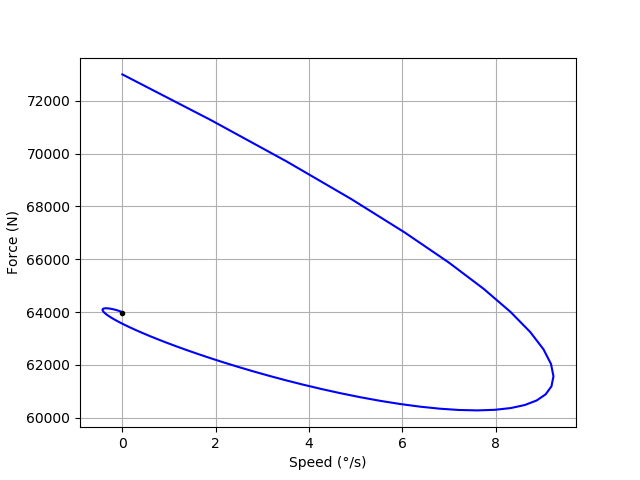

In [25]:
# we create here a force-speed diagram
h, hx1 = plt.subplots(1,1, sharex=True)
hx1.plot(yp,Fdyn,'b',0,Fstat_max,'.k')
hx1.set_ylabel('Force (N)')
hx1.set_xlabel('Speed (°/s)')
hx1.grid()
plt.show()

## Summary

For the next sizing steps, we will use 
- the nozzle max speed (step response)
- the max static torque (max deflexion)
- for max dynamic point (step response) : Max force with acceleration
    
In the nozzle frame (rotational movement):

In [26]:
print("Max nozzle rotational speed: %4.2f °/s"%max(yp))
print("Max static torque : %4.2f N.m"%(Knozzle*teta_max))
print("Max dynamic torque : %4.2f N.m and max acceleration : %4.2f °/s²"%(max(Fdyn)*Evaluate_Larm(0,0),max(ypp)))


Max nozzle rotational speed: 9.24 °/s
Max static torque : 86640.00 N.m
Max dynamic torque : 98860.13 N.m and max acceleration : 811.15 °/s²


For the linear actuator (translational movement) with $d_1=0$ and $d_2=0$:

In [27]:
print("Lever arm: %4.2f m"%Evaluate_Larm(0,0))
print("Max linear speed: %4.2f m/s"%(max(yp)*np.pi/180*Evaluate_Larm(0,0)))
print("Max static force: %4.2f N"%(Knozzle*teta_max/Evaluate_Larm(0,0)))
print("Max dynamic force: %4.2f N and max acceleration: %4.2f m/s²"%(max(Fdyn),max(ypp)*Evaluate_Larm(0,0)**np.pi/180))

Lever arm: 1.35 m
Max linear speed: 0.22 m/s
Max static force: 63977.14 N
Max dynamic force: 73000.79 N and max acceleration: 11.68 m/s²


## Homework



## References 

[Budinger, 2019] Budinger, M., Hazyuk, I., & Coïc, C. (2019). Multi-physics Modeling of Technological Systems. John Wiley & Sons.
